Julia notebook kernel

Heat equation. Source https://johnsbutler.netlify.app/files/Teaching/Numerical_Analysis_for_Differential_Equations.pdf page 90-91.

$$
u = u(x, t)
$$
$$
\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial^2 t}
$$
$$
u(0, t) = u(1, t) = 0 \, \forall t > 0
$$
$$
u(x, 0) = \begin{cases}
        2x & \text{if } x < \frac{1}{2}\\
        2(1-x) & \text{if } x > \frac{1}{2}
    \end{cases}
$$

$i$ for $x$ and $j$ for $t$

Solve as:
$$
w_{i j+1} = r w_{i-1j} + (1 - 2r) w_{ij} + r w_{i + 1j}
$$
where $r = \frac{k}{h^2}, h = x_{i+1} - x_i, k = t_{j+1} - t_j$

Or:
$$
\textbf{w}_{j+1} = A\textbf{w}_j + \textbf{b}_j
$$

In [1]:
lim_x = 1
lim_t = 1
N_x, N_t = 21, 1001

# * u(0, x) = ...
u0(x) = x < 1/2 ? 2 * x : 2 * (1-x)

u0 (generic function with 1 method)

In [2]:
import LinearAlgebra as Lin

N = N_x

xx = range(0, lim_x, length=N_x)
tt = range(0, lim_t, length=N_t)
h = xx[2] - xx[1]
k = tt[2] - tt[1]
r = k/(h^2)

h, k, r, 1-2r

(0.05, 0.001, 0.3999999999999999, 0.20000000000000018)

In [3]:
w = zeros(N_x, N_t)
w[:, 1:1] = u0.(xx)

A = begin
  d = ones(N - 2) .* (1 - 2r)
  du = ones(N - 3) .* r
  dl = du
  Lin.Tridiagonal(dl, d, du)
end

N, size(w), size(A)

(21, (21, 1001), (19, 19))

In [4]:
bj = zeros(N - 2)
for j in 1:N_t-1
  bj[1] = r * w[1, j]
  bj[end] = r * w[N, j]
  wj = w[2:N-1, j]
  w[2:N-1, j+1:j+1] = A * wj + bj
end

println("ok")

ok


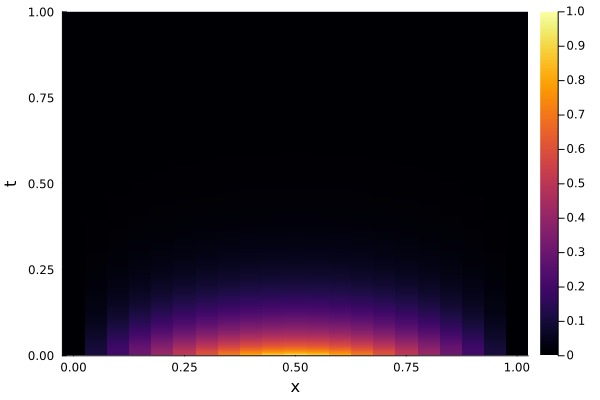

In [5]:
import Plots

Plots.heatmap(xx, tt, w', xlabel="x", ylabel="t")